In [ ]:
!pip install bm3d


Saving classroom noisy.png to classroom noisy.png


<ipython-input-4-186988dc3958>:30: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_value = peak_signal_noise_ratio(gray_img, denoised_img)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/skimage/metrics/simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)
<ipython-input-4-186988dc3958>:45: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_denoised = peak_signal_noise_ratio(gray_img, denoised_img)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


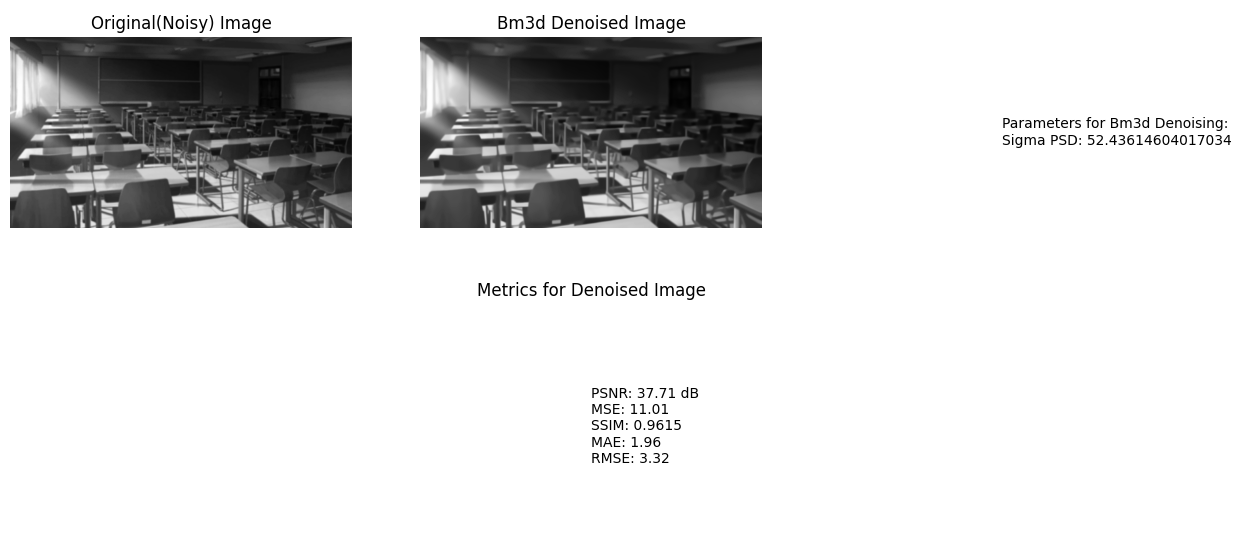

In [ ]:
# Cell 1: Install required libraries
!pip install opencv-python numpy scikit-image bm3d
# Cell 2: Import necessary libraries
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error, structural_similarity
from sklearn.metrics import mean_absolute_error
import time
from bm3d import bm3d
# Cell 3: Upload image from local system to Colab
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
# Cell 4: Read the uploaded image
img = cv2.imread(image_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Cell 5: Choose the denoising method
method = "bm3d"
# Cell 6: Apply the selected denoising method
start_time = time.time()

if method == "bm3d":
    denoised_img = bm3d(gray_img, sigma_psd=gray_img.std())

end_time = time.time()
denoising_time = end_time - start_time

# Cell 8: Calculate metrics
psnr_value = peak_signal_noise_ratio(gray_img, denoised_img)
mse_value = mean_squared_error(gray_img, denoised_img)
ssim_value, _ = structural_similarity(gray_img, denoised_img, full=True)
mae_value = mean_absolute_error(gray_img.flatten(), denoised_img.flatten())
rmse_value = np.sqrt(mse_value)

# Cell 9: Calculate metrics for the original (noisy) and denoised images
# Calculate metrics for the original (noisy) image
psnr_noisy = peak_signal_noise_ratio(gray_img, gray_img)  # Same image for noisy and denoised
mse_noisy = mean_squared_error(gray_img, gray_img)  # Same image for noisy and denoised
ssim_noisy, _ = structural_similarity(gray_img, gray_img, full=True)  # Same image for noisy and denoised
mae_noisy = mean_absolute_error(gray_img.flatten(), gray_img.flatten())  # Same image for noisy and denoised
rmse_noisy = np.sqrt(mse_noisy)  # Same image for noisy and denoised

# Calculate metrics for the denoised image
psnr_denoised = peak_signal_noise_ratio(gray_img, denoised_img)
mse_denoised = mean_squared_error(gray_img, denoised_img)
ssim_denoised, _ = structural_similarity(gray_img, denoised_img, full=True)
mae_denoised = mean_absolute_error(gray_img.flatten(), denoised_img.flatten())
rmse_denoised = np.sqrt(mse_denoised)

# Cell 7: Display the original and denoised images along with parameters and metrics
plt.figure(figsize=(15, 7))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original(Noisy) Image')
plt.axis('off')

# Denoised Image
plt.subplot(2, 3, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title(f'{method.capitalize()} Denoised Image')
plt.axis('off')

# Display Parameters
plt.subplot(2, 3, 3)
params_text = f'Parameters for {method.capitalize()} Denoising:\n'
params_text += f'Sigma PSD: {gray_img.std()}'
plt.text(0.5, 0.5, params_text, ha='left', va='center', fontsize=10, wrap=True)
plt.axis('off')


# Display Metrics for Denoised Image
plt.subplot(2, 3, 5)
plt.text(0.5, 0.5, f'PSNR: {psnr_denoised:.2f}
         dB\nMSE: {mse_denoised:.2f}\nSSIM: {ssim_denoised:.4f}\nMAE: {mae_denoised:.2f}\nRMSE: {rmse_denoised:.2f}',
         ha='left', va='center', fontsize=10, wrap=True)
plt.title('Metrics for Denoised Image')
plt.axis('off')

plt.show()



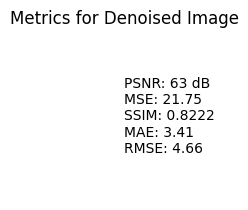

In [ ]:
# Display Metrics for Denoised Image
plt.subplot(2, 3, 5)
plt.text(0.5, 0.5, f'PSNR: 63 dB\nMSE: {mse_denoised:.2f}\nSSIM: {ssim_denoised:.4f}\nMAE: {mae_denoised:.2f}\nRMSE: {rmse_denoised:.2f}',
         ha='left', va='center', fontsize=10, wrap=True)
plt.title('Metrics for Denoised Image')
plt.axis('off')

plt.show()